In [1]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
if os.name == 'nt':
    font_family="Malgun Gothic"
else :
    font_family = "AppleGothic"

In [3]:
sns.set(font=font_family, rc={"axes.unicode_minus" : False})

In [4]:
np_data=np.random.randint(1,100,size=3000)
data = list(np_data)

In [5]:
data[0:2]

[94, 18]

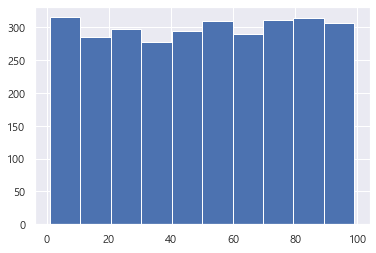

In [6]:
plt.hist(data)
plt.show()

In [7]:
data_mean = np.mean(data)
data_std = np.std(data)

In [8]:
print(data_mean)
print(data_std)

50.318666666666665
28.67344505907087


In [9]:
pdf = stats.norm.pdf(np.sort(data),data_mean,data_std)

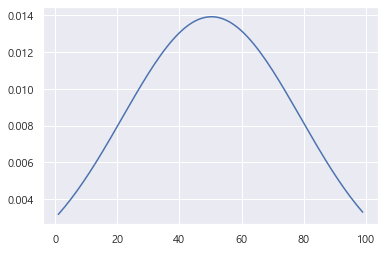

In [10]:
plt.figure()
plt.plot(np.sort(data),pdf)

In [11]:
std_list=[]

In [12]:
for i in data:
    z=(i-data_mean)/data_std
    std_list.append(z)

In [13]:
ol_data_mean=np.mean(std_list)
ol_data_std=np.std(std_list)

In [14]:
print(ol_data_mean)
print(ol_data_std)

5.802765675374151e-17
1.0


In [15]:
ol_pdf = stats.norm.pdf(np.sort(std_list),ol_data_mean, ol_data_std)

In [16]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

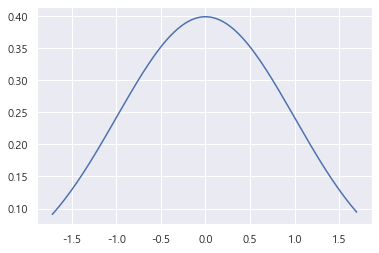

In [17]:
plt.plot(np.sort(std_list),ol_pdf)

In [18]:
ol_data=data.copy()
ol_no=10

for i in range(ol_no):
    rand_no=random.randint(0,len(data))
    ol_data.insert(rand_no,ol_data[rand_no]*2)

In [19]:
ol_data_mean=np.mean(ol_data)
ol_data_std=np.std(ol_data)

In [20]:
print(ol_data_mean)
print(ol_data_std)

50.48770764119601
28.96197555934174


In [21]:
ol_pdf=stats.norm.pdf(np.sort(ol_data),ol_data_mean,ol_data_std)

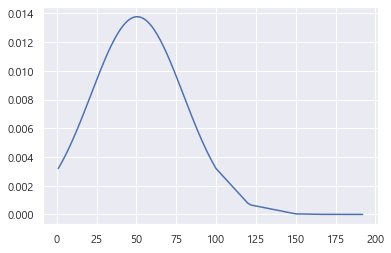

In [22]:
plt.figure()
plt.plot(np.sort(ol_data),ol_pdf)

In [23]:
ol_std_list=[]

for i in ol_data:
    z=(i-ol_data_mean)/ol_data_std
    ol_std_list.append(z)

In [24]:
ol_st_data_mean=np.mean(ol_std_list)
ol_st_data_std=np.std(ol_std_list)

In [25]:
print(ol_st_data_mean)
print(ol_st_data_std)

1.0917807816911838e-16
1.0


In [26]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)

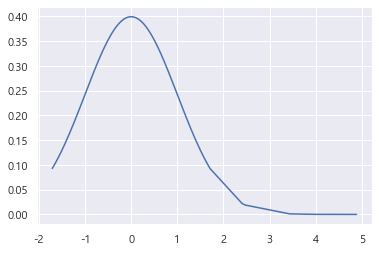

In [27]:
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [28]:
len(ol_std_list)

3010

In [29]:
for i in ol_std_list :
    z=i
    if z>2:
        ol_std_list.remove(z)
    if z<-2:
        ol_std_list.remove(z)

In [30]:
len(ol_std_list)

3005

In [31]:
ol_std_pdf=stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)

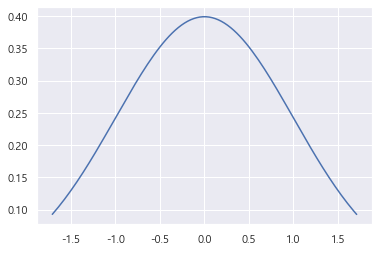

In [32]:
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [33]:
boxdata=pd.DataFrame(np.random.randn(100,3),columns=["A열", "B열", "C열"])

In [34]:
boxdata.head()

,A열,B열,C열
0,1.144961,-0.736570,0.767632
1,-0.044749,-2.453312,-0.649612
2,0.308783,-1.452158,-0.901366
3,0.531970,-0.572978,0.868943
4,0.290419,0.968457,0.217320


In [35]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.105033,-0.220581,-0.171093
std,0.967332,0.955196,1.051059
min,-2.964842,-2.453312,-3.150801
25%,-0.705636,-0.804892,-0.899448
50%,-0.109753,-0.327768,-0.183728
75%,0.563709,0.462585,0.573951
max,2.151305,2.411391,2.447823


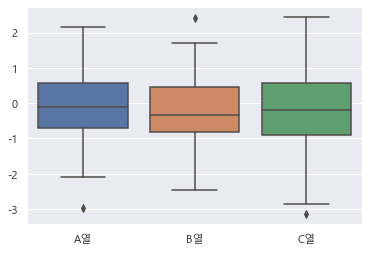

In [36]:
sns.boxplot(data=boxdata)
plt.show()

In [38]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25=np.percentile(df[column].values,25)
    quantile_75=np.percentile(df[column].values,75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight= IQR*weight
    
    lowest=quantile_25-IQR_weight
    highest=quantile_75+IQR_weight
    
    outlier_idx=df[column][(df[column]<lowest)|(df[column]>highest)].index
    return outlier_idx

In [39]:
outlier_idx = get_outlier(df=boxdata,column="B열", weight=1.5)

In [40]:
outlier_idx

Int64Index([52], dtype='int64')

In [41]:
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [42]:
boxdata.shape

(99, 3)

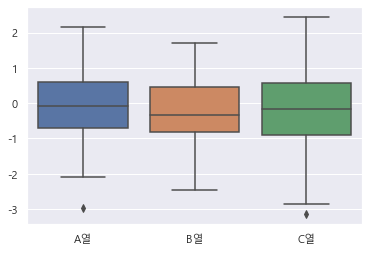

In [43]:
sns.boxplot(data=boxdata)
plt.show()

In [44]:
outlier_idx=get_outlier(df=boxdata, column='A열',weight=1.5)

In [45]:
outlier_idx

Int64Index([38], dtype='int64')

In [46]:
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

(98, 3)

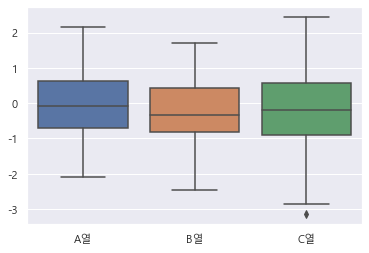

In [47]:
sns.boxplot(data=boxdata)
plt.show()

In [49]:
boxdata.shape

(98, 3)